<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-27 00:05:11--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.6MB/s    in 3.2s    

2025-04-27 00:05:14 (63.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 166.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 187.6 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 138.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 126.9 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


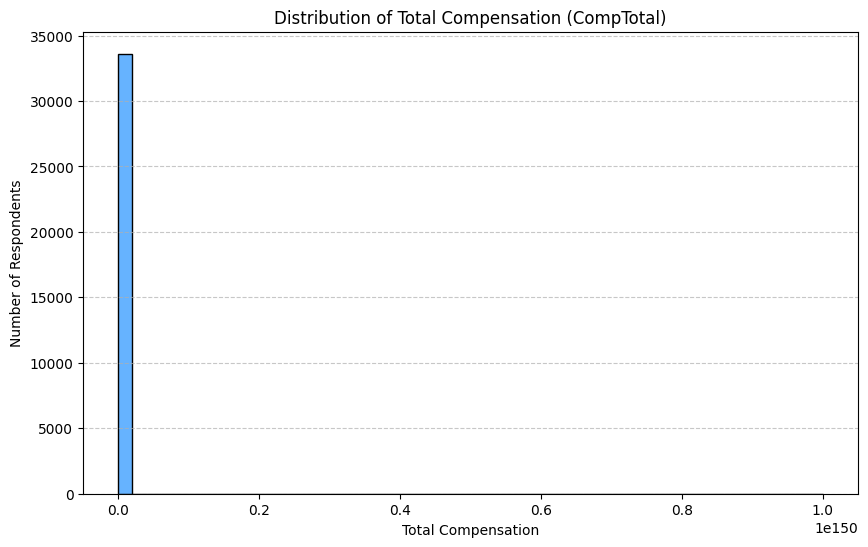

In [10]:
## Write your code here
QUERY = "SELECT CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)
# drop na
df_comp = df_comp.dropna()
df_comp = df_comp[df_comp['CompTotal'] > 0]
# plot
plt.figure(figsize=(10, 6))
plt.hist(df_comp['CompTotal'], bins=50, color='#66b3ff', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


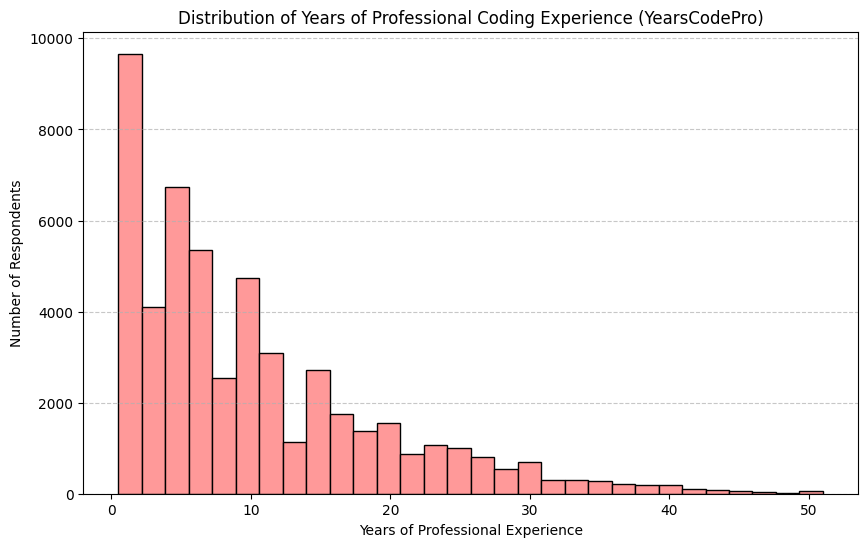

In [11]:
## Write your code here
QUERY = "SELECT YearsCodePro FROM main"
df_years = pd.read_sql_query(QUERY, conn)
# drop na
df_years = df_years.dropna()
# replace text with numeric values
df_years['YearsCodePro'] = df_years['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
# convert to numeric 
df_years['YearsCodePro'] = pd.to_numeric(df_years['YearsCodePro'], errors='coerce')
# drop unconverted rows
df_years = df_years.dropna()
# plot
plt.figure(figsize=(10, 6))
plt.hist(df_years['YearsCodePro'], bins=30, color='#ff9999', edgecolor='black')
plt.title('Distribution of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


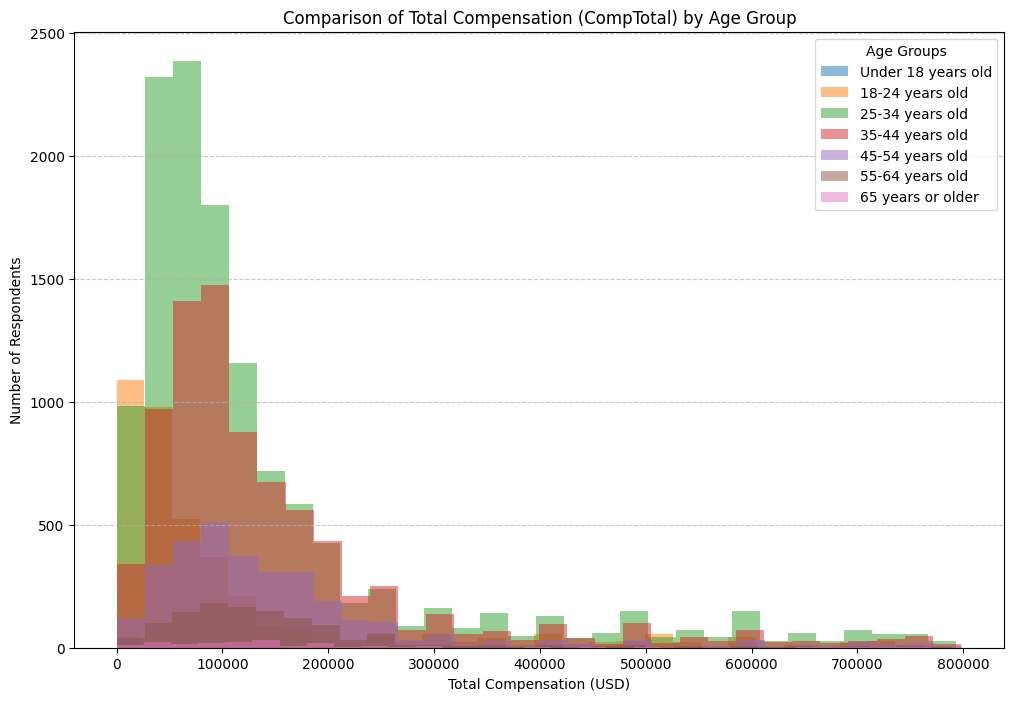

In [20]:
## Write your code here
QUERY = "SELECT Age, CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)
# drop na
df_comp = df_comp.dropna(subset=['Age', 'CompTotal'])  # Drop rows where Age or CompTotal is missing
df_comp = df_comp[df_comp['CompTotal'] < 800000]
# select age groups
selected_age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df_filtered = df_comp[df_comp['Age'].isin(selected_age_groups)]
# plot fro all age groups
plt.figure(figsize=(12, 8))
for age_group in selected_age_groups:
    subset = df_filtered[df_filtered['Age'] == age_group]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age_group)
plt.title('Comparison of Total Compensation (CompTotal) by Age Group')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.legend(title="Age Groups")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

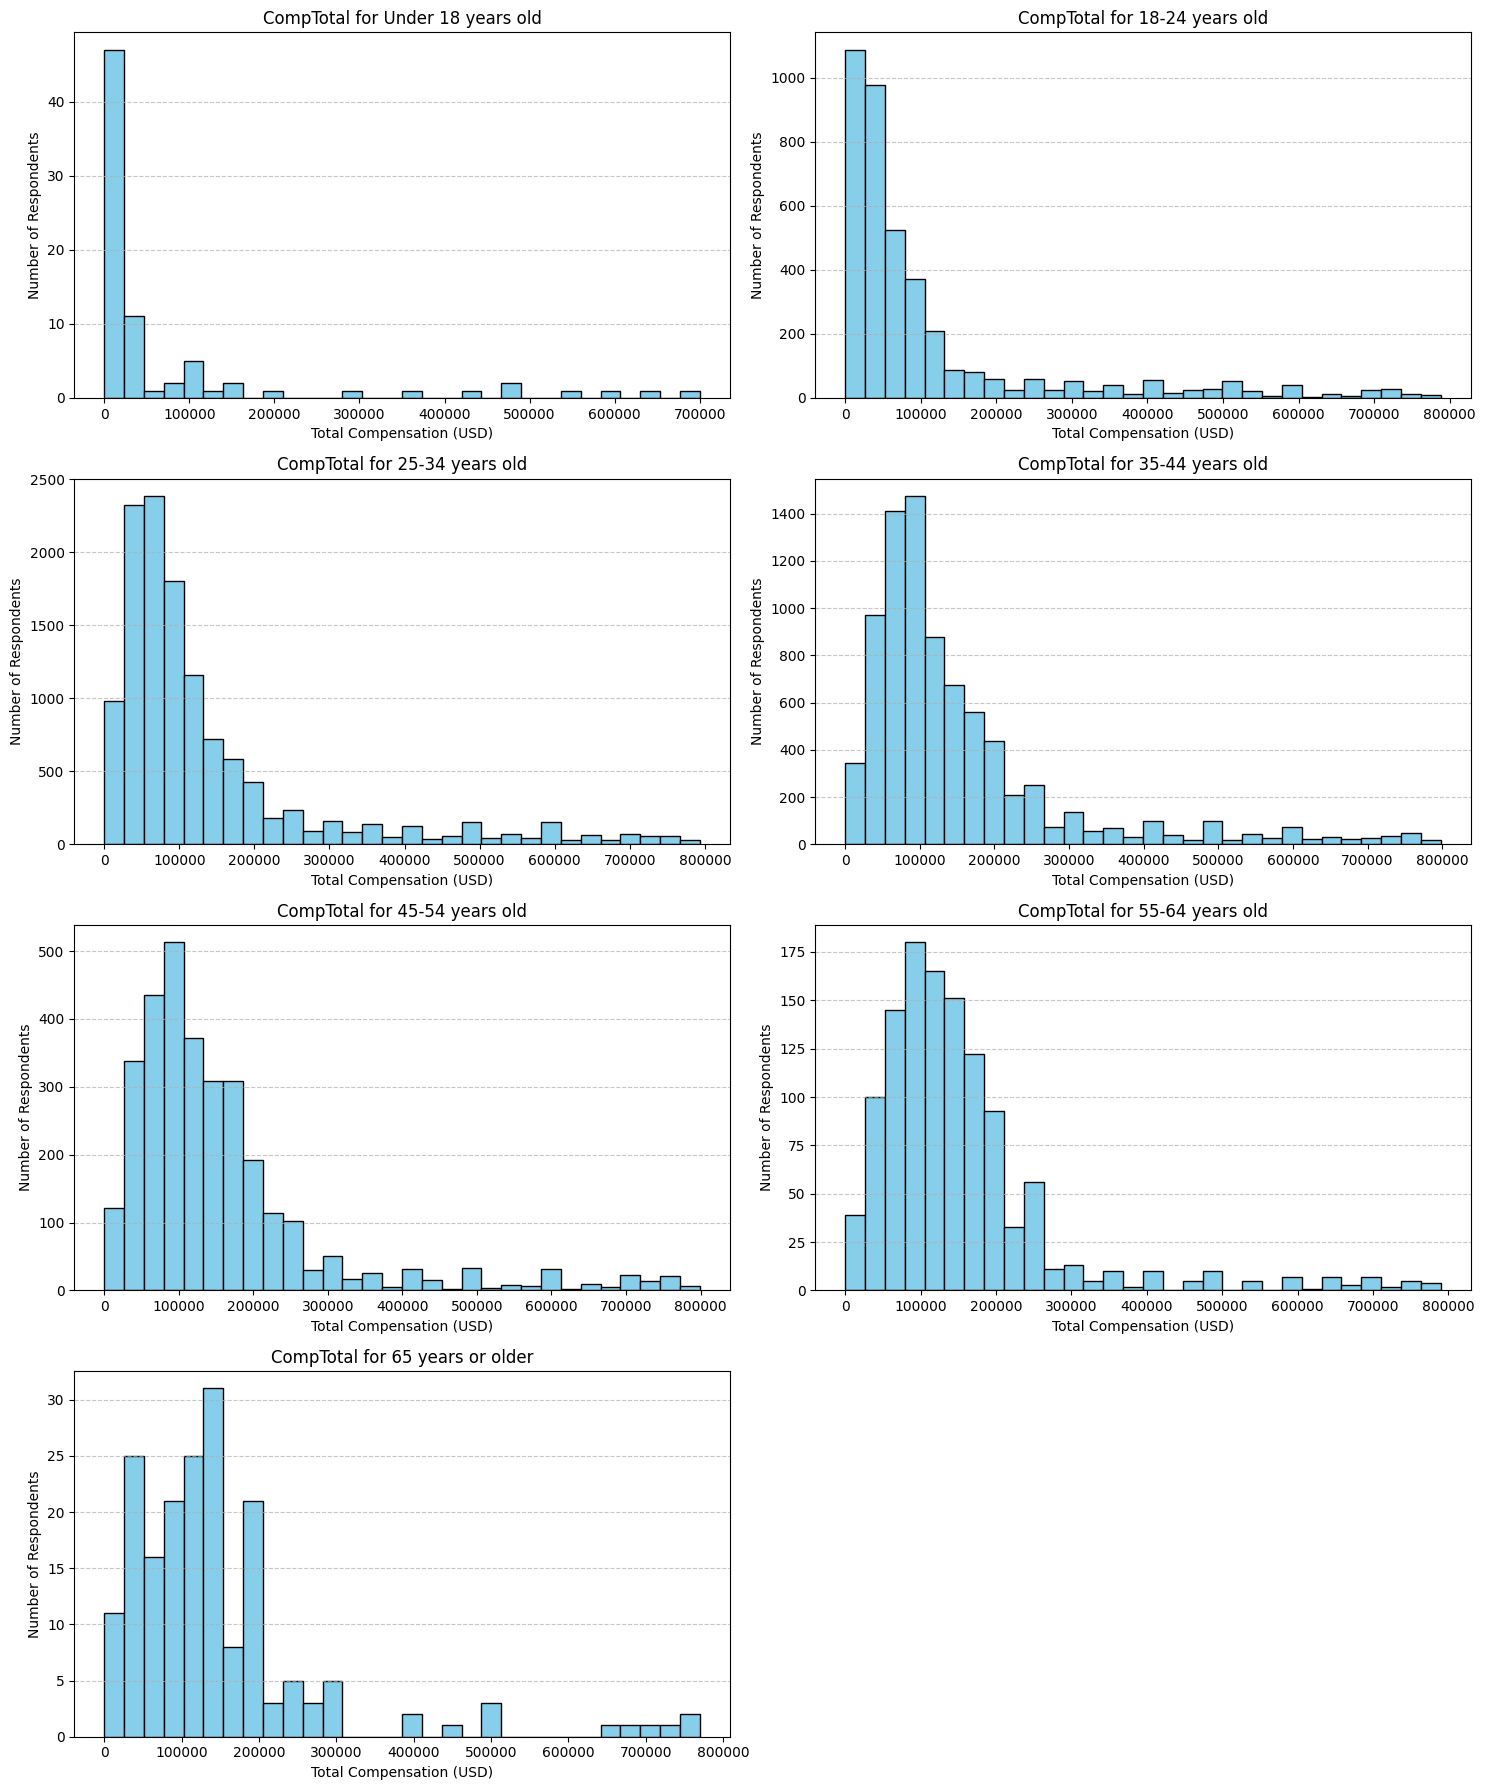

In [22]:
QUERY = "SELECT Age, CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)
# drop na
df_comp = df_comp.dropna(subset=['Age', 'CompTotal'])
# select age groups
age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_filtered = df_comp[df_comp['Age'].isin(age_groups)]
df_filtered = df_filtered[df_filtered['CompTotal'] < 800000]
# subplot for each age group
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, figsize=(15, 18))  # 4 rows, 2 columns
axes = axes.flatten()
# plot histograms
for idx, age_group in enumerate(age_groups):
    ax = axes[idx]
    subset = df_filtered[df_filtered['Age'] == age_group]
    ax.hist(subset['CompTotal'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'CompTotal for {age_group}')
    ax.set_xlabel('Total Compensation (USD)')
    ax.set_ylabel('Number of Respondents')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
# hide any empty 
fig.delaxes(axes[-1])
# layout
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_299/3568510991.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeSearchingMidpoint'] = df_filtered['TimeSearching'].map(time_searching_mapping)


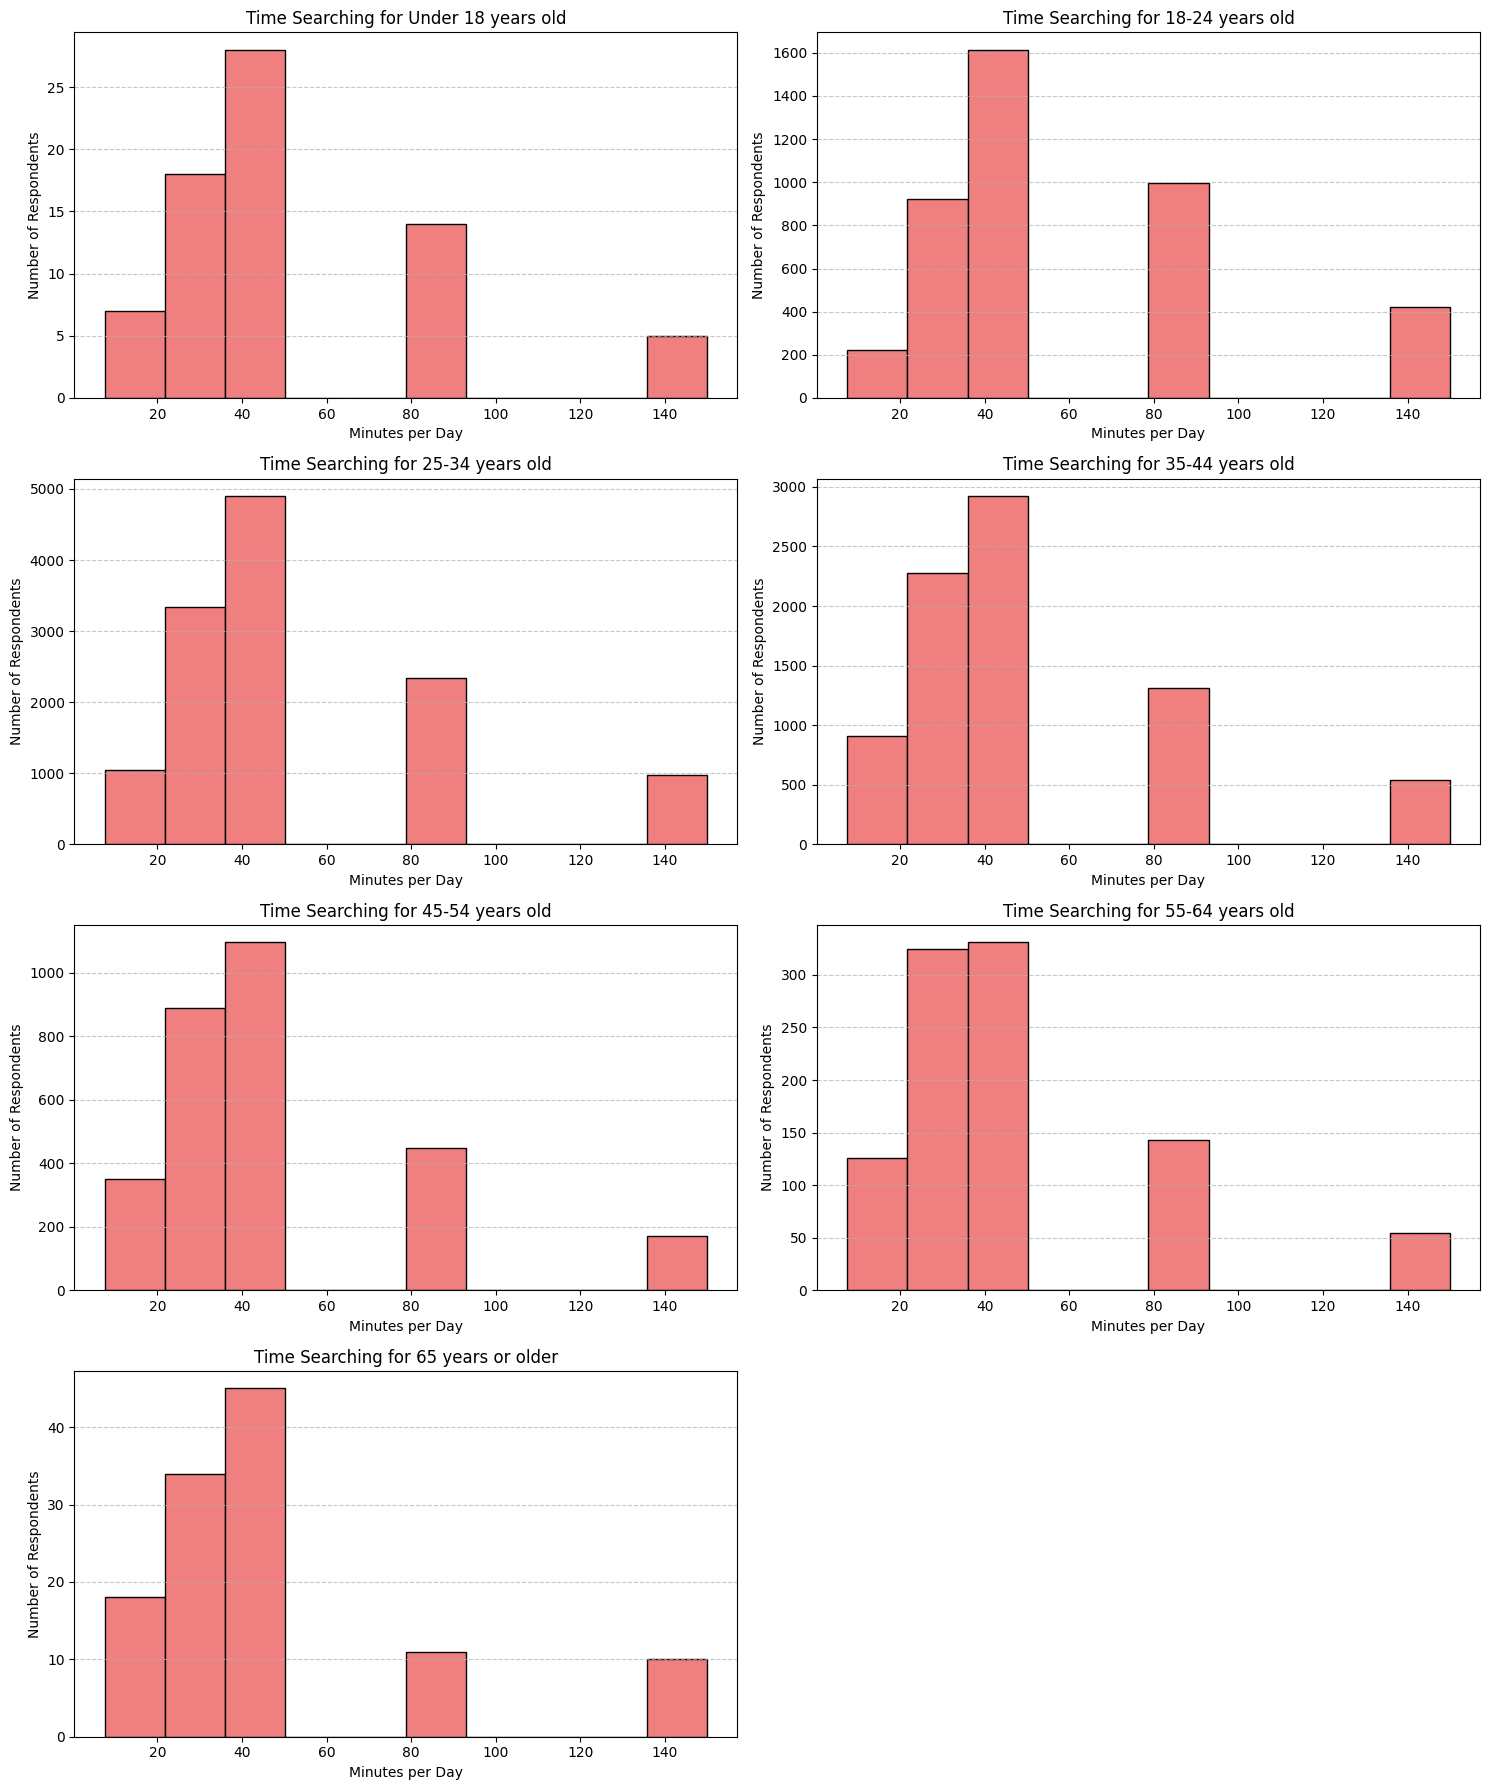

In [24]:
## Write your code here
QUERY = "SELECT Age, TimeSearching FROM main"
df_time = pd.read_sql_query(QUERY, conn)
# drop na
df_time = df_time.dropna(subset=['Age', 'TimeSearching'])
# select age groups
age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_filtered = df_time[df_time['Age'].isin(age_groups)]
# map TimeSearching to numeric midpoints 
time_searching_mapping = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
    "None": None,
    None: None
}
df_filtered['TimeSearchingMidpoint'] = df_filtered['TimeSearching'].map(time_searching_mapping)
# drop any missing rows
df_filtered = df_filtered.dropna(subset=['TimeSearchingMidpoint'])
# subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, figsize=(15, 18))  # 4 rows x 2 columns
axes = axes.flatten()
# plot histograms
for idx, age_group in enumerate(age_groups):
    ax = axes[idx]
    subset = df_filtered[df_filtered['Age'] == age_group]
    ax.hist(subset['TimeSearchingMidpoint'], bins=10, color='lightcoral', edgecolor='black')
    ax.set_title(f'Time Searching for {age_group}')
    ax.set_xlabel('Minutes per Day')
    ax.set_ylabel('Number of Respondents')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
# hide any empty subplots
fig.delaxes(axes[-1])
# layout
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


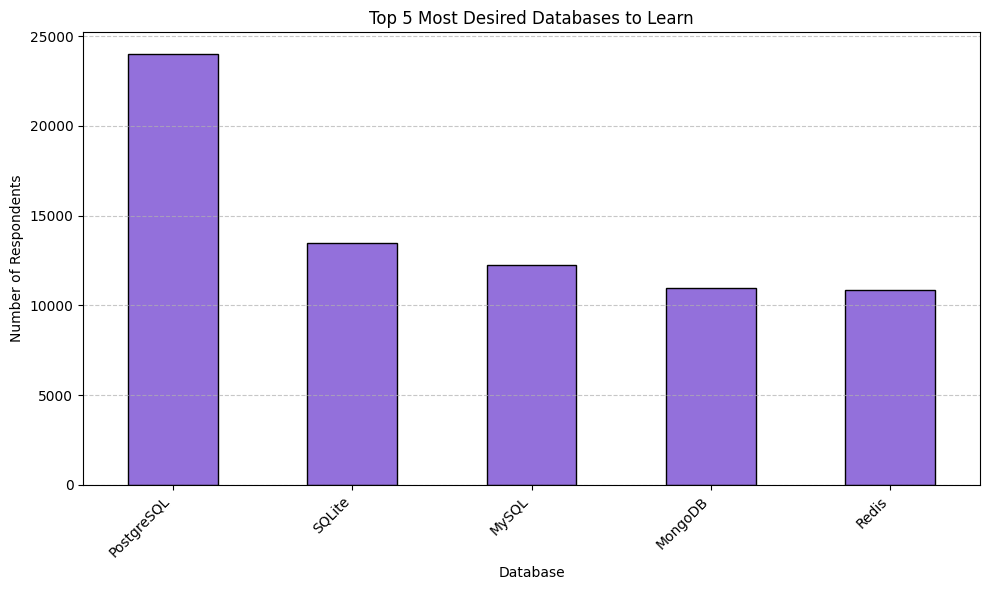

In [25]:
## Write your code here
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df_db = pd.read_sql_query(QUERY, conn)
# drop na
df_db = df_db.dropna(subset=['DatabaseWantToWorkWith'])
# split multiple databases
df_db_expanded = df_db['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()
# count 
db_counts = df_db_expanded.value_counts()
# top 5
top5_db = db_counts.head(5)
# plot histogram
plt.figure(figsize=(10, 6))
top5_db.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Top 5 Most Desired Databases to Learn')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


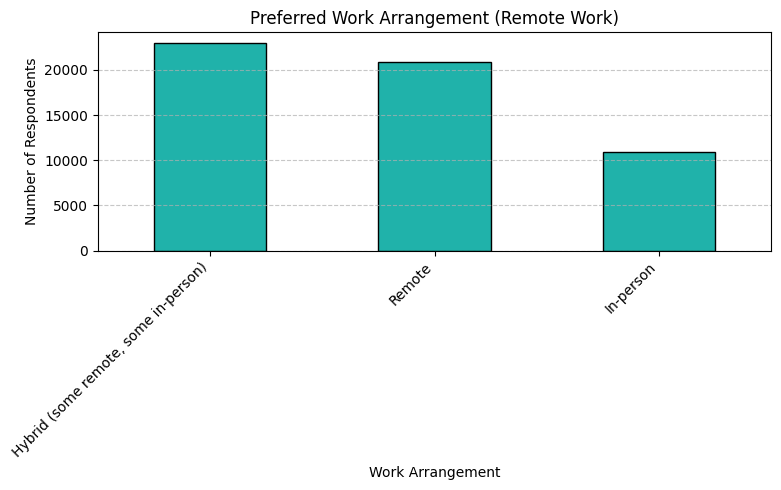

In [41]:
## Write your code here
QUERY = "SELECT RemoteWork FROM main"
df_remote = pd.read_sql_query(QUERY, conn)
# drop na
df_remote = df_remote.dropna(subset=['RemoteWork'])
# count
remote_counts = df_remote['RemoteWork'].value_counts()
# plot histogram
plt.figure(figsize=(8, 5))
remote_counts.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Preferred Work Arrangement (Remote Work)')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


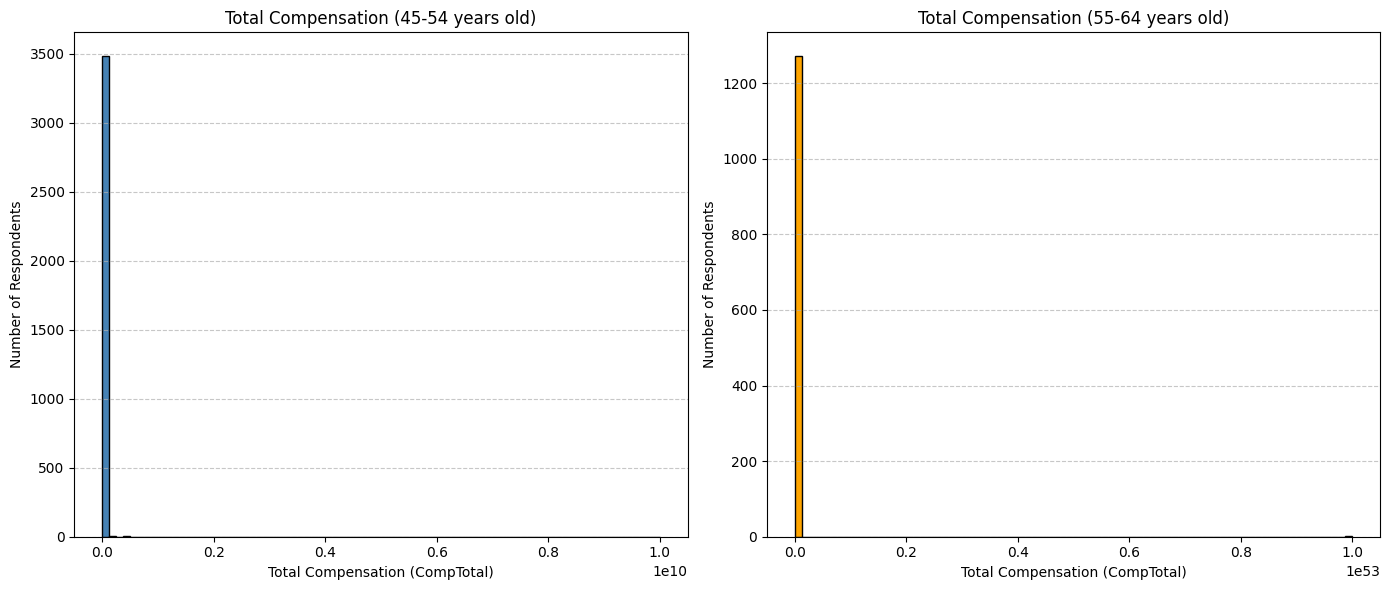

In [47]:
## Write your code here
# Step 1: Query Age and CompTotal columns
QUERY = "SELECT Age, CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)
# select age groups
age_groups = ['45-54 years old', '55-64 years old']
# clean data
df_comp_filtered = df_comp[df_comp['Age'].isin(age_groups)]
df_comp_filtered = df_comp_filtered.dropna(subset=['CompTotal'])
df_comp_filtered = df_comp_filtered[df_comp_filtered['CompTotal'] > 0]
# seperate age groups
comp_45_54 = df_comp_filtered[df_comp_filtered['Age'] == '45-54 years old']['CompTotal']
comp_55_64 = df_comp_filtered[df_comp_filtered['Age'] == '55-64 years old']['CompTotal']
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# plot for ages 45-54
axes[0].hist(comp_45_54, bins=80, color='steelblue', edgecolor='black')
axes[0].set_title('Total Compensation (45-54 years old)')
axes[0].set_xlabel('Total Compensation (CompTotal)')
axes[0].set_ylabel('Number of Respondents')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# plot for ages 55-64
axes[1].hist(comp_55_64, bins=80, color='orange', edgecolor='black')
axes[1].set_title('Total Compensation (55-64 years old)')
axes[1].set_xlabel('Total Compensation (CompTotal)')
axes[1].set_ylabel('Number of Respondents')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# layout
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [49]:
QUERY = "SELECT DISTINCT YearsCodePro FROM main"
df_ycp = pd.read_sql_query(QUERY, conn)
print(df_ycp)

          YearsCodePro
0                 None
1                   17
2                   27
3                    7
4                   11
5                   25
6                   12
7                   10
8                    3
9     Less than 1 year
10                  18
11                  37
12                  15
13                  20
14                   6
15                   2
16                  16
17                   8
18                  14
19                   4
20                  45
21                   1
22                  24
23                  29
24                   5
25                  30
26                  26
27                   9
28                  33
29                  13
30                  35
31                  23
32                  22
33                  31
34                  19
35                  21
36                  28
37                  34
38                  32
39                  40
40                  50
41                  39
42         

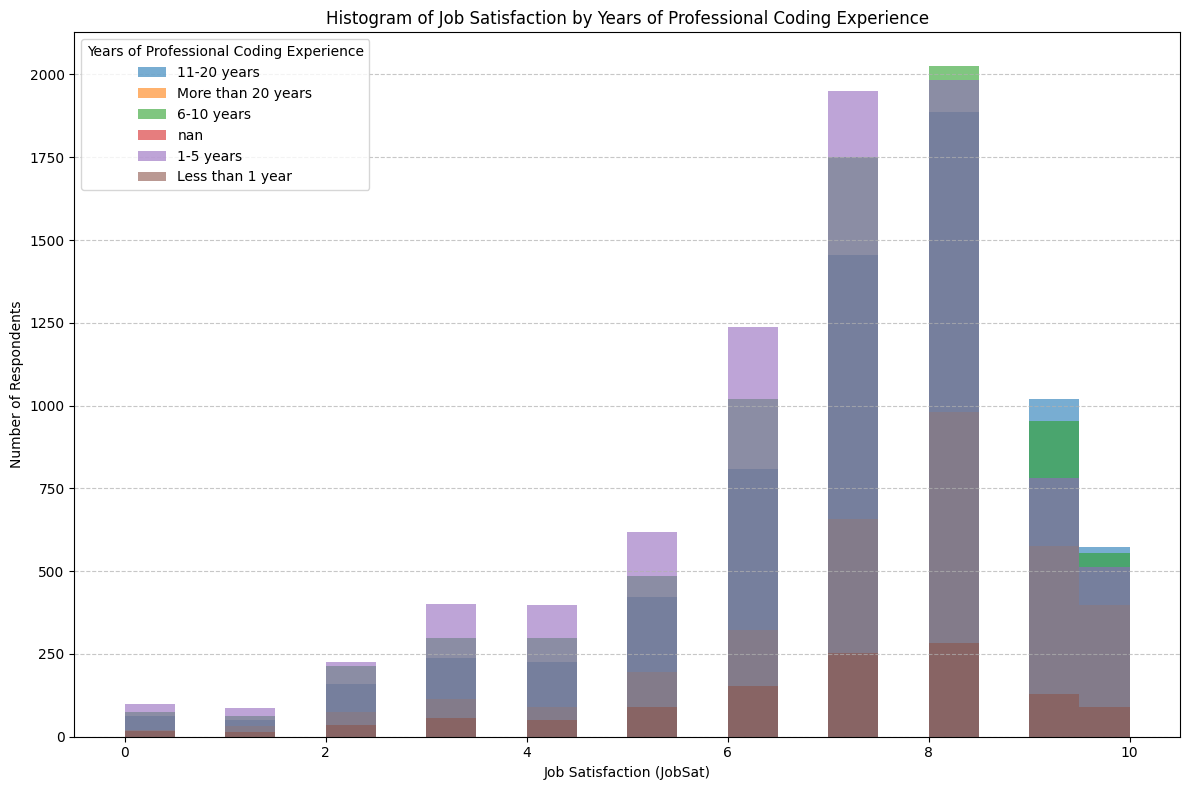

In [53]:
## Write your code here
import numpy as np
QUERY = "SELECT JobSat, YearsCodePro FROM main"
df_jobsat = pd.read_sql_query(QUERY, conn)
# clean
df_jobsat = df_jobsat.dropna(subset=['JobSat', 'YearsCodePro'])
# convert 'YearsCodePro' to numeric
df_jobsat['YearsCodePro'] = pd.to_numeric(df_jobsat['YearsCodePro'], errors='coerce')
# define bins for YearsCodePro
bins = [0, 1, 5, 10, 20, np.inf]
labels = ['Less than 1 year', '1-5 years', '6-10 years', '11-20 years', 'More than 20 years']
# create new column for grouped years
df_jobsat['YearsCodeProGroup'] = pd.cut(df_jobsat['YearsCodePro'], bins=bins, labels=labels)
# plot histogram
plt.figure(figsize=(12, 8))
for group in df_jobsat['YearsCodeProGroup'].unique():
    subset = df_jobsat[df_jobsat['YearsCodeProGroup'] == group]
    plt.hist(subset['JobSat'], bins=20, alpha=0.6, label=f'{group}')
plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction (JobSat)')
plt.ylabel('Number of Respondents')
plt.legend(title='Years of Professional Coding Experience')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# layout
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
